# SMS Spam Collection
This is a text corpus of over 5,500 English SMS messages with ~13% labeled as spam. The text file contains one message per line with two columns: the label ("ham" or "spam") and the raw text of the message. Messages labeled as "ham" are non-spam messages that can be considered legitimate. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

emails = pd.read_csv("SMSSpamCollection.csv", header=None)
emails

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


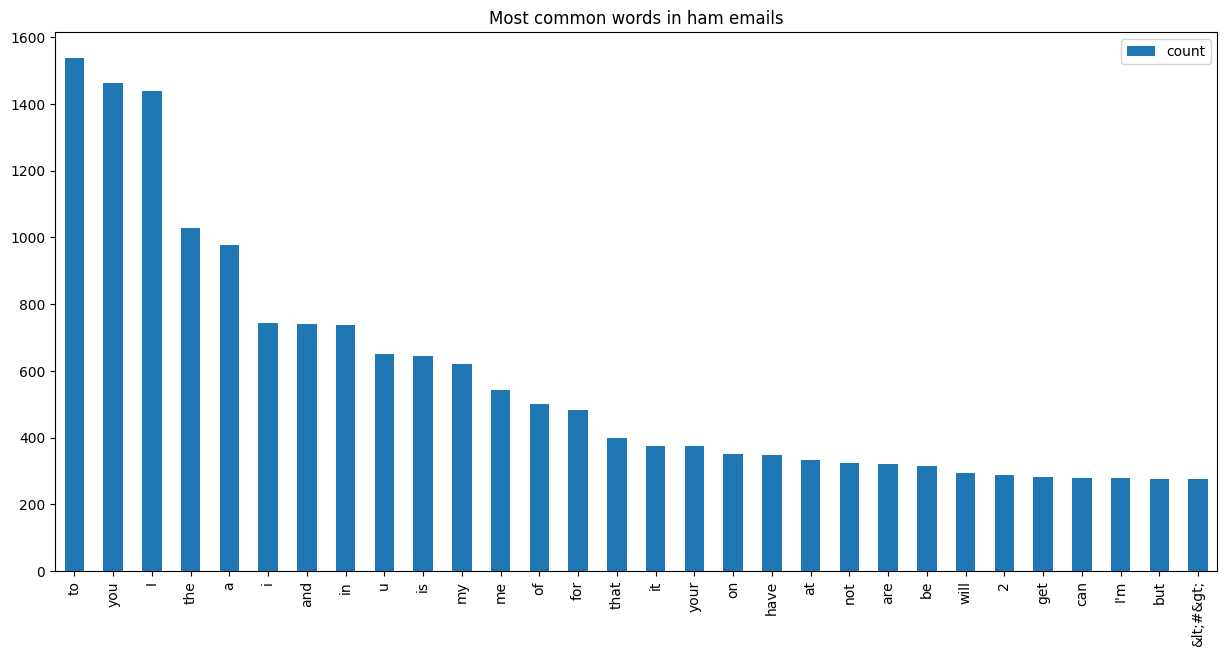

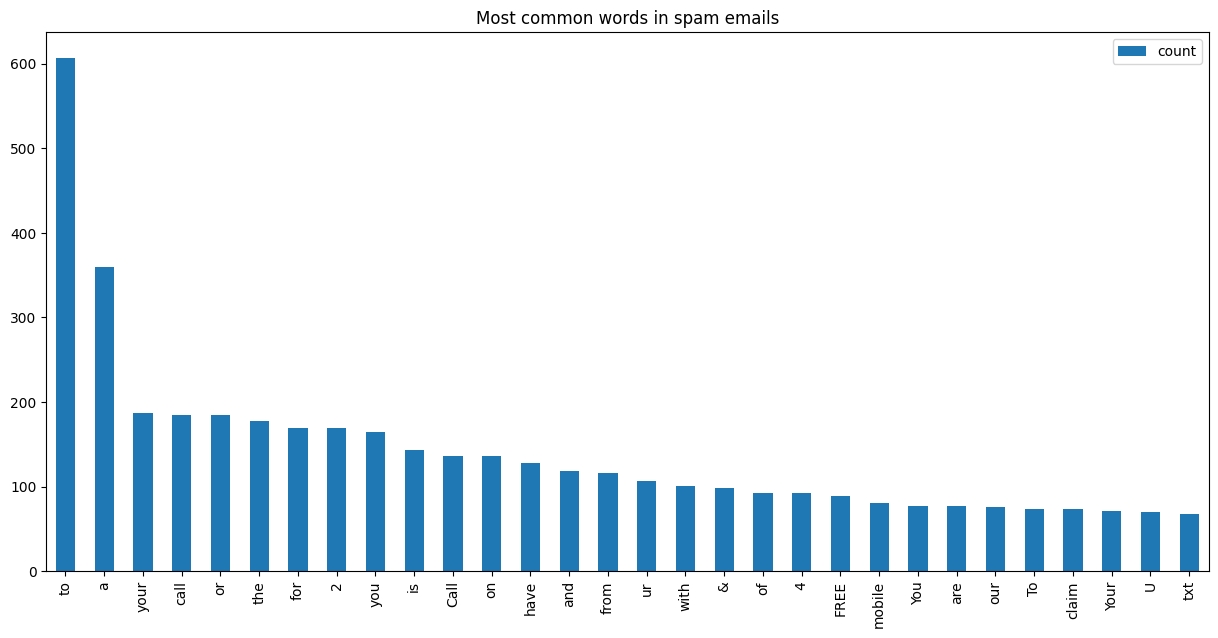

In [63]:
ham_emails = emails[emails[0] == 'ham'][1]
spam_emails = emails[emails[0] == 'spam'][1]

from collections import Counter

def word_map(df):
    all_words = []
    for message in df:
        words = message.split()
        all_words.extend(words)
    word_counts = Counter(all_words)
    return pd.DataFrame.from_dict(word_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)

ham_word_map = word_map(ham_emails)
spam_word_map = word_map(spam_emails)

# Define function to display word map
def display_word_map(df, title):
    df[:30].plot(kind='bar', figsize=(15, 7), title=title)
    plt.show()

# Display word maps for ham and spam emails
display_word_map(ham_word_map, 'Most common words in ham emails')
display_word_map(spam_word_map, 'Most common words in spam emails')

In [23]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/repl/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

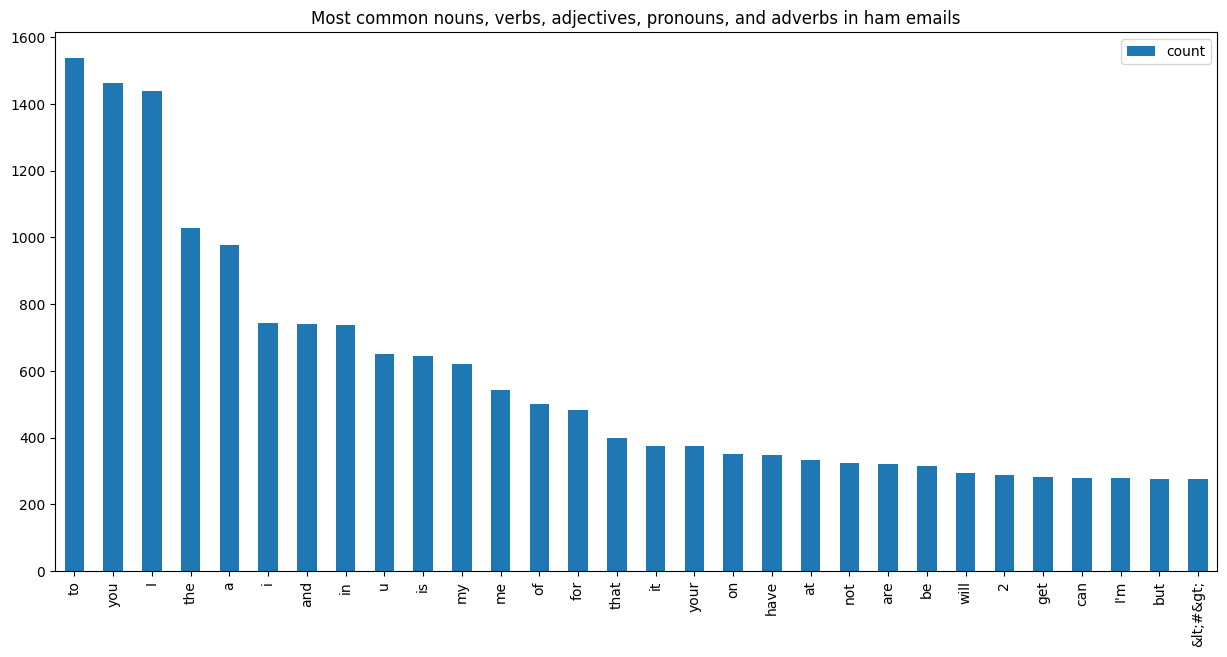

,count
to,1538
you,1462
I,1439
the,1029
a,977
...,...
"Hmm,",1
cut?,1
sense?,1
"paragon,",1


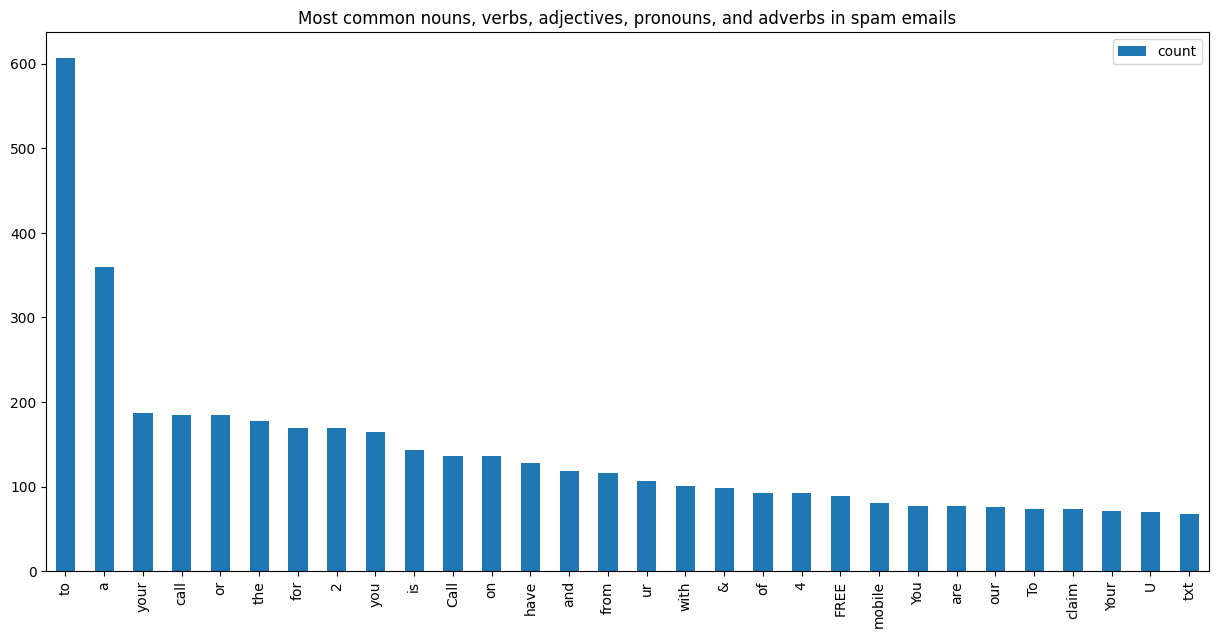

,count
to,607
a,360
your,187
call,185
or,185
...,...
subs,1
expired,1
re-sub,1
MONOC,1


In [58]:
ham_emails = emails[emails[0] == 'ham'][1]
spam_emails = emails[emails[0] == 'spam'][1]

# Define function to extract nouns, verbs, adjectives, and adverbs from a message
def extract_words(message):
    words = []
    for sentence in sent_tokenize(message):
        for word, pos in nltk.pos_tag(word_tokenize(sentence)):
            if pos.startswith(('N', 'V', 'J', 'R', 'PRP')) and not (pos == 'CC' or pos == 'IN'):

                words.append(word)
    return words

# Define function to create a word map of nouns, verbs, adjectives, and adverbs in a DataFrame
def make_word_map(df):
    all_words = []
    for message in df:
        words = extract_words(message)
        all_words.extend(words)
    word_counts = Counter(all_words)
    return pd.DataFrame.from_dict(word_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)

def display_word_map(df, title):
    df[:30].plot(kind='bar', figsize=(15, 7), title=title)
    plt.show()

def display_word_map(df, title):
    df[:30].plot(kind='bar', figsize=(15, 7), title=title)
    plt.show()

# Create word maps for ham and spam emails
ham_word_map = word_map(ham_emails)
spam_word_map = word_map(spam_emails)

# Display word maps for ham and spam emails
display_word_map(ham_word_map, 'Most common nouns, verbs, adjectives, pronouns, and adverbs in ham emails')
display(ham_word_map)
display_word_map(spam_word_map, 'Most common nouns, verbs, adjectives, pronouns, and adverbs in spam emails')
display(spam_word_map)


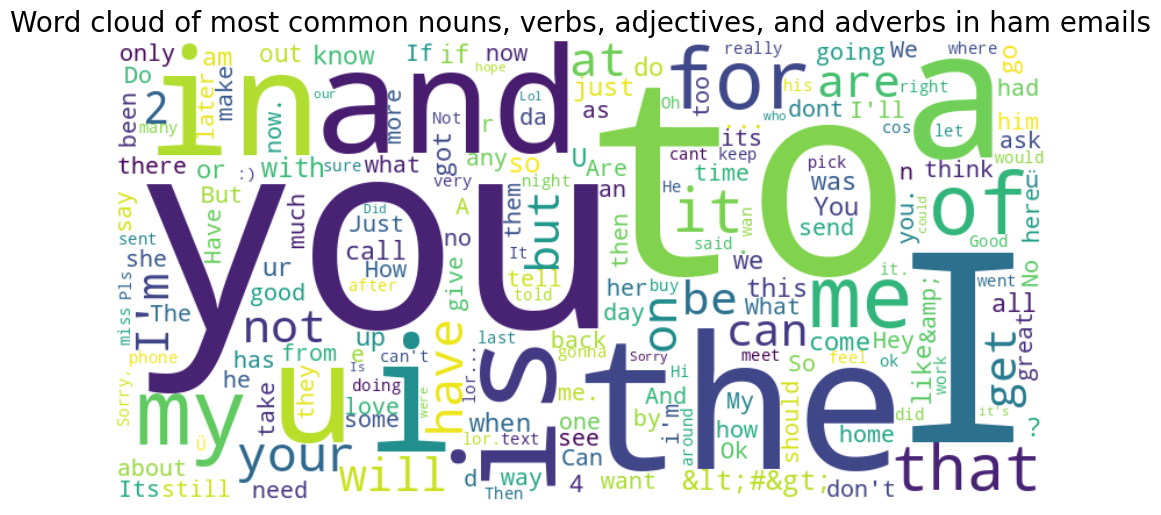

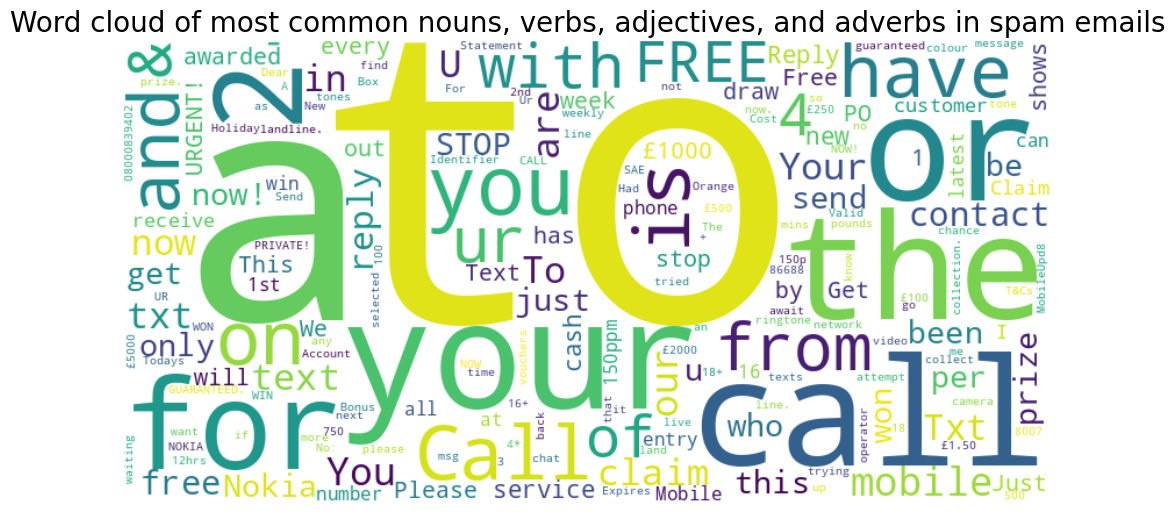

In [55]:
from wordcloud import WordCloud

# Define function to create word cloud
def create_word_cloud(df, title):
    # Convert DataFrame to dictionary
    word_dict = df.to_dict()['count']

    # Generate word cloud image
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict)

    # Display the image
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()


# Create word clouds for ham and spam emails
create_word_cloud(ham_word_map, 'Word cloud of most common nouns, verbs, adjectives, and adverbs in ham emails')
create_word_cloud(spam_word_map, 'Word cloud of most common nouns, verbs, adjectives, and adverbs in spam emails')


[Source](https://www.dt.fee.unicamp.br/~tiago/smsspamcollection/) of dataset. This corpus was created by  [Tiago A. Almeida](https://www.servidores.ufscar.br/talmeida/) and José María Gómez Hidalgo.

**Citations**: 

- Almeida, T.A., Gómez Hidalgo, J.M., Yamakami, A. Contributions to the Study of SMS Spam Filtering: New Collection and Results.  Proceedings of the 2011 ACM Symposium on Document Engineering (DOCENG'11), Mountain View, CA, USA, 2011. 

- Gómez Hidalgo, J.M., Almeida, T.A., Yamakami, A. On the Validity of a New SMS Spam Collection.  Proceedings of the 11th IEEE International Conference on Machine Learning and Applications (ICMLA'12), Boca Raton, FL, USA, 2012. 

- Almeida, T.A., Gómez Hidalgo, J.M., Silva, T.P.  Towards SMS Spam Filtering: Results under a New Dataset.   International Journal of Information Security Science (IJISS), 2(1), 1-18, 2013. 

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: What are the most common words in spam versus normal messages?
- 📊 **Visualize**: Create a word cloud visualizing the most common words in the dataset.
- 🔎 **Analyze**: What word is most likely to indicate that a message is spam?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You work for a telecom company that is launching a new messaging app. Unfortunately, previous spam filters that they have used are out of date and no longer effective. They have asked you whether you can use new data they have supplied to distinguish between spam and regular messages accurately. They have also told you that it is essential that regular messages are rarely, if ever, categorized as spam.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.